# Time series analysis

In [26]:
import pandas as pd
import matplotlib
import numpy as np
import statsmodels
import matplotlib.pyplot as plt
import scipy

In [27]:
print("pandas:", pd.__version__)
print("matplotlib:", matplotlib.__version__)
print("numpy:", np.__version__)
print("statsmodels:", statsmodels.__version__)
print("scipy:", scipy.__version__)

pandas: 2.2.2
matplotlib: 3.10.0
numpy: 2.0.2
statsmodels: 0.14.5
scipy: 1.16.2


# Data

import dataset: "data2.csv", the frist row has a Nan value

importazione del dataset : "data2.csv"

In [28]:
data= pd.read_csv("data2.csv", sep=';', header=None)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   object 
 1   1       1001 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [30]:
data.head()

,0,1
0,NaN,0.00
1,2023-01-01,0.00
2,2023-01-02,-0.07
3,2023-01-03,0.86
4,2023-01-04,0.51


In [31]:
print(data.isnull().sum())

0    1
1    0
dtype: int64


In [32]:


data = data.iloc[1:].reset_index(drop=True) # rimuove prima riga con NaN

# Converte le colonne
data.iloc[:, 0] = pd.to_datetime(data.iloc[:, 0], errors="coerce")
data.iloc[:, 1] = pd.to_numeric(data.iloc[:, 1], errors="coerce")

# Rinomina le colonne
data.columns = ["date", "value"]

# Imposta l'indice
data = data.set_index("date")

/usr/local/lib/python3.12/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2023-01-01 to 2025-09-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   1000 non-null   float64
dtypes: float64(1)
memory usage: 15.6 KB


In [34]:
data.head()

,value
date,
2023-01-01,0.00
2023-01-02,-0.07
2023-01-03,0.86
2023-01-04,0.51
2023-01-05,1.35


# Data plot

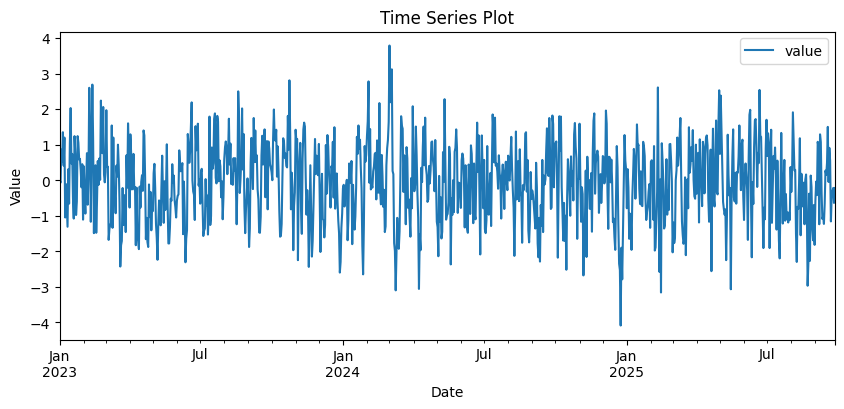

In [35]:
import matplotlib.pyplot as plt

data.plot(figsize=(10,4)) # grafico serie temporale
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Time Series Plot")
plt.show()


# Stationarity

## ADF test

A stationarity test is performed (ADF test), and the series is found to be stationary.

Si esegue un test di stazionarietà (ADF test ), si verifica dal test che la serie risulta stazionaria.

In [36]:
from statsmodels.tsa.stattools import adfuller

ts_value = data["value"]

# Test di Dickey-Fuller aumentato
result = adfuller(ts_value, autolag="AIC")

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Used lags:", result[2])
print("Number of observations:", result[3])
print("Critical Values:", result[4])

if result[1] < 0.05:
    print("➡️ La serie è stazionaria (rifiuto H0)")
else:
    print("➡️ La serie NON è stazionaria (non rifiuto H0)")

ADF Statistic: -20.405471964385942
p-value: 0.0
Used lags: 0
Number of observations: 999
Critical Values: {'1%': np.float64(-3.4369127451400474), '5%': np.float64(-2.864437475834273), '10%': np.float64(-2.568312754566378)}
➡️ La serie è stazionaria (rifiuto H0)


## KPSS test

Alternatively to the ADF test, the KPSS test can be performed (in this case, the null hypothesis is that the series is stationary, so for p_value > 0.05, we do not reject H0 and the series is stationary

In alternativa al test ADF, si può eseguire il test KPSS ( in questo caso l'ipotesi nulla è che la serie sia stazionaria, per cui per p_value > 0.05 , non rifiuto H0 e la serie è stazionaria  )

In [37]:
from statsmodels.tsa.stattools import kpss

kpss_result = kpss(ts_value, regression='c', nlags='auto')
print("KPSS Statistic:", kpss_result[0])
print("p-value:", kpss_result[1])
print("Critical Values:", kpss_result[3])

alpha = 0.05
if kpss_result[1] < alpha:
    print("➡️ La serie NON è stazionaria (rifiuto H0)")
else:
    print("➡️ La serie è stazionaria (non rifiuto H0)")

KPSS Statistic: 0.15827776448667963
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
➡️ La serie è stazionaria (non rifiuto H0)


/tmp/ipython-input-738478077.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(ts_value, regression='c', nlags='auto')


# ACF e PACF

ACF and PACF correlograms are plotted. The behavior shown is as follows: in the ACF, the values at lag 1, lag 2, and lag 3 decrease slowly, after which the spectrum of values oscillates around zero, remaining within the dashed lines. This indicates an autoregressive AR(q) behavior. To determine the value of q, we look at the PACF, where q = 1 is the only value outside the dashed line, followed by the remaining values oscillating within the dashed line. An AR(1) behavior of the historical series is hypothesized

Si tracciano i correlogrammi ACF e PACF.
Il comportamento che si evidenzia è il seguente: in ACF si vedono i valori in corrispondenza dei lag1, lag2, lag3 decrescere lentamente dopo di che lo spettro dei valori oscilla intorno allo zero mantenendosi nelle barre tratteggiate, questo è indice di un comportamento autoregressivo AR(q), per determinare il valore di q guardiamo a PACF, q = 1, unico valore a uscire dalla barra si ha per lag1, poi i restanti valori oscillano rimanendo nella barra tratteggiata.
Si ipotizza un comportamento AR(1) della serie strorica.

<Figure size 640x480 with 0 Axes>

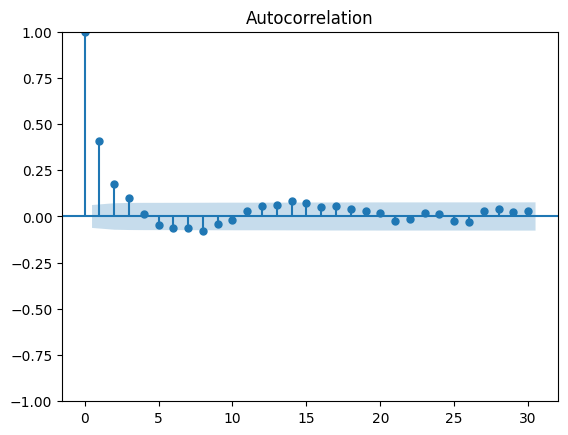

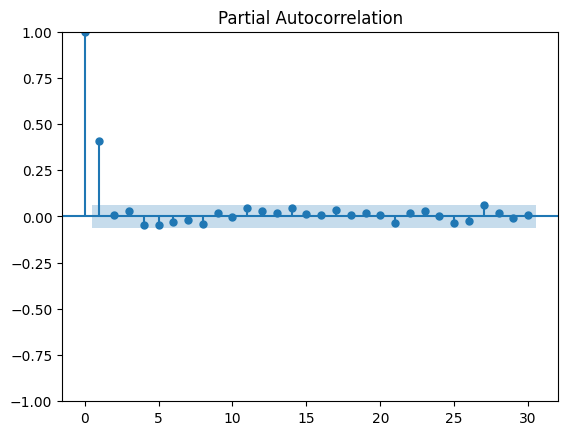

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # ACF e PACF

fig = plt.figure()
plot_acf(data['value'], lags=30)
plot_pacf(data['value'], lags=30)
plt.show()

# Model

The AR(1) model is explained, and the residuals are tested.

Si esplica il modello AR(1), e si testano i residui.
Il modello stimato è del tipo.



$$
X_t = \phi X_{t-1} + \varepsilon_t
$$
	​

In [39]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(data, lags=1, old_names=False)    # lags=1 -> AR(1)
res = model.fit()
print(res.summary())   # guarda coef, std err, p-value

                            AutoReg Model Results                             
Dep. Variable:                  value   No. Observations:                 1000
Model:                     AutoReg(1)   Log Likelihood               -1420.539
Method:               Conditional MLE   S.D. of innovations              1.003
Date:                Fri, 26 Sep 2025   AIC                           2847.078
Time:                        16:01:03   BIC                           2861.798
Sample:                    01-02-2023   HQIC                          2852.673
                         - 09-26-2025                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0431      0.032     -1.357      0.175      -0.105       0.019
value.L1       0.4108      0.029     14.241      0.000       0.354       0.467
                                    Roots           

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


The fitted AR(1) model shows that the previous value ($X_{t-1}$) significantly predicts the current value ($X_t$) with a coefficient of 0.4108 (p < 0.001). The intercept (-0.0431) is not significant (p = 0.175). The AR root is 2.4343, confirming stationarity. Overall, the series is well-described by an AR(1) process.

Il modello AR(1) mostra che il valore precedente ($X_{t-1}$) predice significativamente il valore attuale ($X_t$) con un coefficiente di 0,4108 (p < 0,001). L'intercetta (-0,0431) non è significativa (p = 0,175). La radice AR è 2,4343, confermando la stazionarietà. In generale, la serie è ben descritta da un processo AR(1

# Residual diagnostics

The model diagnostics were successful because the residuals behave like white noise.

La diagnostica del modello è andata a buon fine poiché i residui si comportano come rumore bianco.

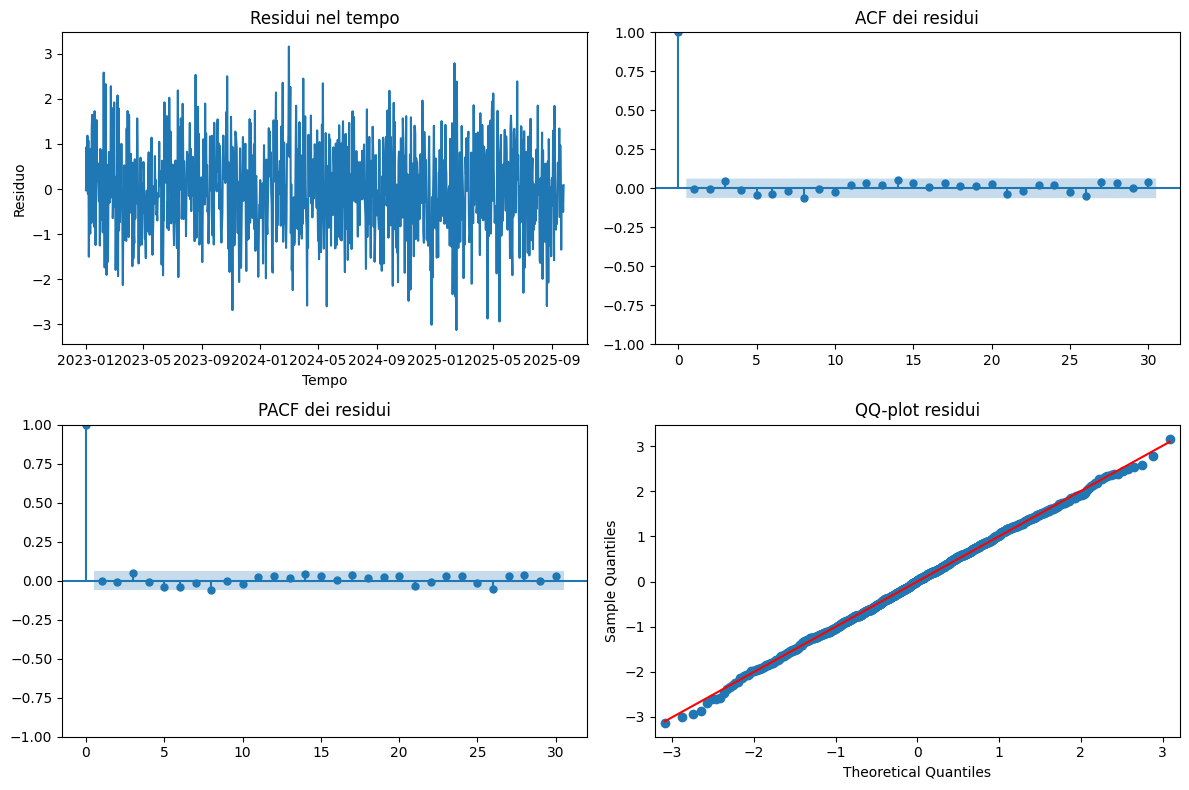

Ljung-Box test residui:
      lb_stat  lb_pvalue
10   9.687022   0.468368
20  17.641610   0.611004
30  27.508738   0.596452
Jarque–Bera: stat = 1.358, p-value = 0.507


In [40]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import jarque_bera

resid = res.resid  # residui del modello


fig, axes = plt.subplots(2, 2, figsize=(12,8))

# 1. Serie temporale dei residui
axes[0,0].plot(resid)
axes[0,0].set_title("Residui nel tempo")
axes[0,0].set_xlabel("Tempo")
axes[0,0].set_ylabel("Residuo")

# 2. ACF dei residui
plot_acf(resid, lags=30, ax=axes[0,1])
axes[0,1].set_title("ACF dei residui")

# 3. PACF dei residui
plot_pacf(resid, lags=30, ax=axes[1,0])
axes[1,0].set_title("PACF dei residui")

# 4. QQ plot (normalità visiva)
sm.qqplot(resid, line="s", ax=axes[1,1])
axes[1,1].set_title("QQ-plot residui")

plt.tight_layout()
plt.show()

# Test Ljung-Box
lb = acorr_ljungbox(resid, lags=[10,20,30], return_df=True)
print("Ljung-Box test residui:")
print(lb)

# Test Jarque-Bera
jb_stat, jb_pvalue = jarque_bera(resid)
print(f"Jarque–Bera: stat = {jb_stat:.3f}, p-value = {jb_pvalue:.3f}")

